In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as tranform
from torch.utils.tensorboard import SummaryWriter
import torch.nn.functional as F

import utils
from models.generator import Generator
from models.discriminator  import Discriminator

import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import os

In [2]:
device = 'cuda' if torch.cuda.is_available() else  'cpu'
print(device)

cuda


In [13]:
generator = Generator().to(device='cpu')

generator.load_state_dict(torch.load('./checkpoints/trained_netG.pth'))

<All keys matched successfully>

In [4]:
generator.parameters

<bound method Module.parameters of Generator(
  (down): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Sequential(
      (0): ReflectionPad2d((1, 1, 1, 1))
      (1): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), bias=False)
    )
    (4): Sequential(
      (0): ReflectionPad2d((1, 1, 1, 1))
      (1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), bias=False)
    )
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): Sequential(
      (0): ReflectionPad2d((1, 1, 1, 1))
      (1): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), bias=False)
    )
    (8): Sequential(
      (0): ReflectionPad2d((1, 1, 1, 1))
      (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), bias=False)
    )
    (9): BatchNorm2d(256, eps=1e-05, mom

In [5]:
transforms = tranform.Compose([
    tranform.ToTensor(),
    tranform.Normalize(mean=[0.485, 0.456, 0.406],
                        std = [0.229, 0.224, 0.225])
])

inv_normalize = tranform.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.255],
    std=[1/0.229, 1/0.224, 1/0.255]
)

In [6]:
## Testing the model

img = cv2.imread('./Images/Jesse_Sr.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img.shape

(3088, 2316, 3)

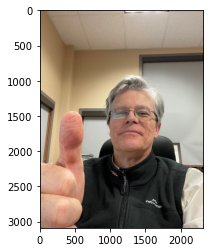

In [7]:
plt.imshow(img)

In [14]:
tensor_img = transforms(img).to(device='cpu')
tensor_img.shape

torch.Size([3, 3088, 2316])

In [15]:
tensor_img = tensor_img.unsqueeze(0)
tensor_img.shape

torch.Size([1, 3, 3088, 2316])

In [16]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [17]:
import time
generator.eval()
start = time.time()
with torch.no_grad():
    pred = generator(tensor_img)
end = time.time()
print(end-start)
generator.train()

53.46807670593262


Generator(
  (down): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Sequential(
      (0): ReflectionPad2d((1, 1, 1, 1))
      (1): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), bias=False)
    )
    (4): Sequential(
      (0): ReflectionPad2d((1, 1, 1, 1))
      (1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), bias=False)
    )
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): Sequential(
      (0): ReflectionPad2d((1, 1, 1, 1))
      (1): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), bias=False)
    )
    (8): Sequential(
      (0): ReflectionPad2d((1, 1, 1, 1))
      (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), bias=False)
    )
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_runni

In [18]:
pred.shape

torch.Size([1, 3, 3088, 2316])

In [19]:
pred = pred.squeeze(0)
pred.shape

torch.Size([3, 3088, 2316])

In [20]:
pred_inv = inv_normalize(pred)
pred_inv.shape

torch.Size([3, 3088, 2316])

In [21]:
pred_inv = pred_inv.permute(1,2,0)
pred_inv.shape

torch.Size([3088, 2316, 3])

In [22]:
pred_np = pred_inv.numpy()
pred_np1 = pred_np*255
pred_np11 = pred_np1.astype(np.uint8)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


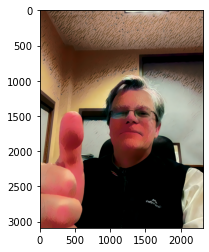

In [23]:
plt.imshow(pred_np)

In [24]:
cv2.imwrite('./Images/Doc.png',cv2.cvtColor(pred_np*255,cv2.COLOR_RGB2BGR))

True

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


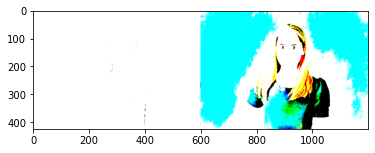

In [107]:
combined = np.concatenate((img,pred_np*255),axis=1)
cv2.imwrite('./Images/combined.png',combined.astype(np.uint8))
plt.imshow(combined)

In [115]:
x = cv2.cvtColor(pred_np*255,cv2.COLOR_RGB2BGR)
combo = np.concatenate((cv2.cvtColor(img,cv2.COLOR_RGB2BGR),x),axis=1)
cv2.imwrite('./Images/combo.png',combo)

True